## Poisson's Equation
\begin{equation}
\nabla^2 u = f
\end{equation}

* $u$ is unknown
* $f$ is known
* $\Omega$ is domain


## Laplace's Equation
Homogenuous case (i.e. $f=0$)
\begin{equation}
\nabla^2 u = 0
\end{equation}


### 2D Laplce Equation
\begin{equation}
\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0
\end{equation}

Discretizing this and if $\Delta x = \Delta y$,
\begin{equation}
p_{i+1, j}   + p_{i-1,j} + p_{i,j+1}  + p_{i, j-1}- 4 p_{i,j} = 0
\end{equation}

### Jacobi Method
\begin{equation}
p^{k+1}_{i,j} = \frac{1}{4} \left(p^{k}_{i,j-1} + p^k_{i,j+1} + p^{k}_{i-1,j} + p^k_{i+1,j} \right)
\end{equation}

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# set the font family and size to use for Matplotlib figures
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [4]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    """
    Creates a Matplotlib figure with a 3D surface plot
    of the scalar field p.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats
    p : numpy.ndarray
        Scalar field to plot as a 2D array of floats
    label : string, optional
        Axis label to use in the third direction
        default: 'z'
    elev : float, optional
        Elevation angle in the z plane
        default: 30.0
    azim : float, optional
        Azimuth angle in the x,y plane
        default: 45.0
    """
    
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    
    ax.plot_surface(X, Y, p, cmap=cm.viridis)
    
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

In [5]:
def laplace_solution(x, y, Lx, Ly):
    """
    Computes and returns the analytical solution of the Laplace equation
    on a given two-dimensional Cartesian grid.

    Parameters
    ----------
    x : numpy.ndarray
        The gridline locations in the x direction as a 1D array of floats
    y : numpy.ndarray
        The gridline locations in the y direction as a 1D array of floats
    Lx : float
        Length of the domain in the x direction
    Ly : float
        Length of the domain in the y direction

    Returns
    -------
    p : numpy.ndarray
        The analytical solution as a 2D array of floats
    """
    
    X, Y = numpy.meshgrid(x, y)
    p = (numpy.sinh(1.5 * numpy.pi * Y / Ly) /
         numpy.sinh(1.5 * numpy.pi * Ly / Lx) *
         numpy.sin(1.5 * numpy.pi * X / Lx))
    
    return p

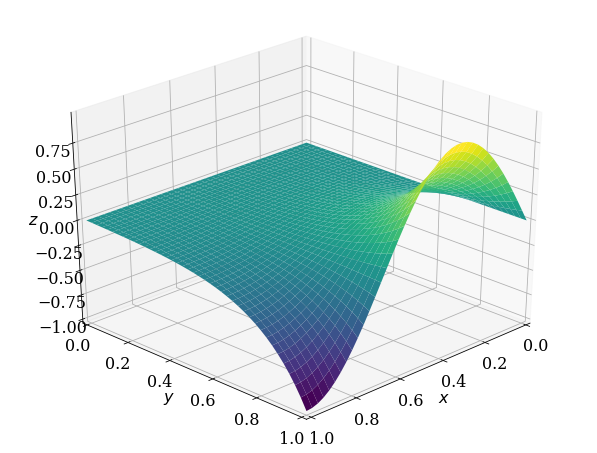

In [6]:
# parameters
Lx = 1.0  # domain length in the x direction
Ly = 1.0  # domain length in the y direction
nx = 41  # number of points in the x direction
ny = 41  # number of points in the y direction

# gridline locations
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# compute the analytical solution
p_exact = laplace_solution(x, y, Lx, Ly)

# plot the analytical solution
plot_3d(x, y, p_exact)

In [7]:
def l2_norm(p, p_ref):
    """
    Computes and returns the relative L2-norm of the difference between
    a solution p and a reference solution p_ref.

    Parameters
    ----------
    p : numpy.ndarray
        The solution as an array of floats
    p_ref : numpy.ndarray
        The reference solution as an array of floats

    Returns
    -------
    diff : float
        The relative L2-norm of the difference
    """
    
    l2_diff = (numpy.sqrt(numpy.sum((p - p_ref)**2)) /
               numpy.sqrt(numpy.sum(p_ref**2)))
    
    return l2_diff

In [8]:
def laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation using Jacobi relaxation method.

    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats
    maxiter : integer, optional
        Maximum number of iterations to perform
        default: 20000
    rtol : float, optional
        Relative tolerance for convergence
        default: 1e-6

    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats
    ite : integer
        The number of iterations performed
    diff : float
        The final relative L2-norm of the difference
    """
    
    p = p0.copy()
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        
        # update the solution at interior points
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] +
                                p[:-2, 1:-1] + p[2:, 1:-1])
        
        # Neumann condition (zero-gradient) at the right boundary
        p[1:-1, -1] = p[1:-1, -2]
        
        # compute the residual as the L2-norm of the difference
        diff = l2_norm(p, pn)
        ite += 1
        
    return p, ite, diff

In [9]:
# ICs
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

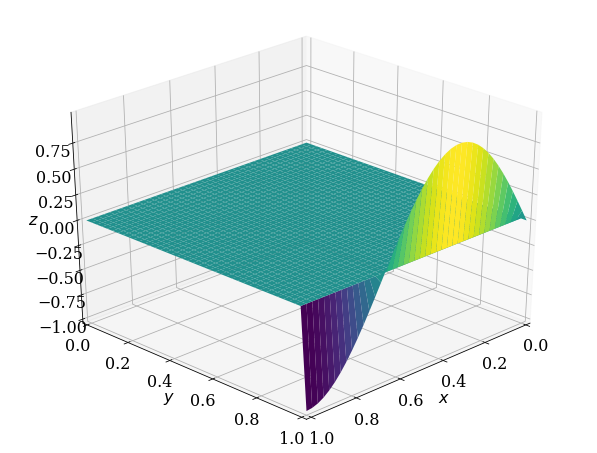

In [10]:
# plot the initial conditions
plot_3d(x, y, p0)

In [11]:
# compute the solution using Jacobi relaxation method
p, ites, diff = laplace_2d_jacobi(p0, rtol=1e-8)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(diff))

Jacobi relaxation: 4473 iterations to reach a relative difference of 9.989253685041417e-09


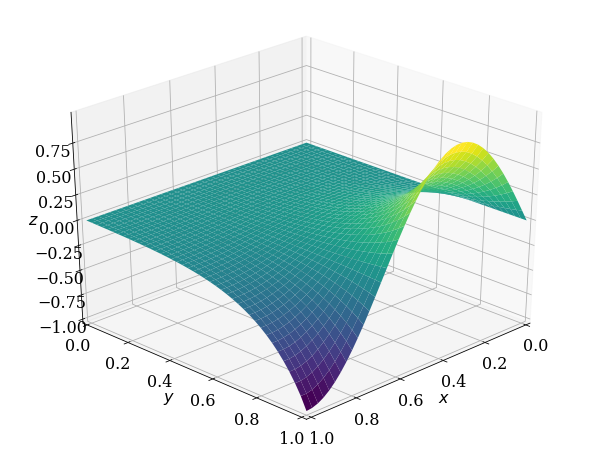

In [12]:
# plot the numerical solution
plot_3d(x, y, p)

## Convergence

In [13]:
# list of the grid sizes
nx_values = [11, 21, 41, 81]

# create an empty list to record the error on each grid
errors = []

# compute the solution and error for each grid size
for nx in nx_values:
    ny = nx  # same number of points in all directions.
    
    # create the gridline locations
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    
    # set the initial conditions
    p0 = numpy.zeros((ny, nx))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    
    # relax the solution
    p, _, _ = laplace_2d_jacobi(p0, rtol=1e-8)
    
    # compute the analytical solution
    p_exact = laplace_solution(x, y, Lx, Ly)
    
    # compute and record the relative L2-norm of the error
    errors.append(l2_norm(p, p_exact))

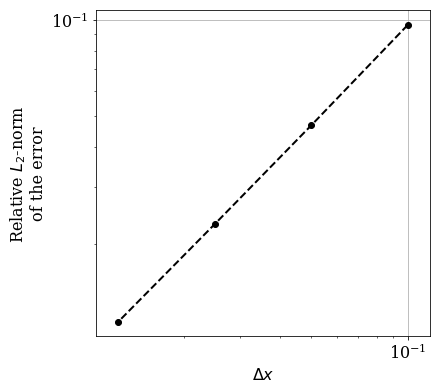

In [14]:
# plot the error versus the grid-spacing size
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors, color='black', linestyle='--', 
              linewidth=2, marker='o')
pyplot.axis('equal');

In [15]:
def laplace_2d_jacobi_neumann(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation using Jacobi relaxation method.

    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats
    maxiter : integer, optional
        Maximum number of iterations to perform
        default: 20000
    rtol : float, optional
        Relative tolerance for convergence
        default: 1e-6

    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats
    ite : integer
        The number of iterations performed
    diff : float
        The final relative L2-norm of the difference
    """
    
    p = p0.copy()
    diff = rtol + 1.0  # intial difference
    ite = 0  # iteration index
    
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        
        # update the solution at interior points
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:]
                                + p[:-2, 1:-1] + p[2:, 1:-1])
        
        # 2nd-order Neumann condition (zero-gradient) at right boundary
        p[1:-1, -1] = 0.25 * (2.0 * pn[1:-1, -2]
                              + pn[2:, -1] + pn[:-2, -1])
        
        # compute the residual as the L2-norm of the difference
        diff = l2_norm(p, pn)
        ite += 1
        
    return p, ite, diff

In [16]:
# list of the grid sizes
nx_values = [11, 21, 41, 81]

# create an empty list to record the error on each grid
errors = []

# compute the solution and error for each grid size
for nx in nx_values:
    ny = nx  # same number of points in all directions.
    
    # create the gridline locations
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    
    # set the initial conditions
    p0 = numpy.zeros((ny, nx))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    
    # relax the solution
    p, _, _ = laplace_2d_jacobi_neumann(p0, rtol=1e-8)
    
    # compute the analytical solution
    p_exact = laplace_solution(x, y, Lx, Ly)
    
# compute and record the relative L2-norm of the error
    errors.append(l2_norm(p, p_exact))

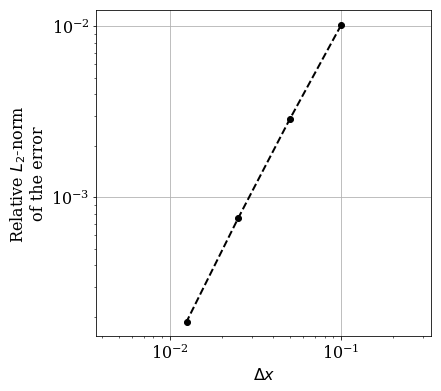

In [17]:
# plot the error versus the grid-spacing size
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors, color='black', linestyle='--', 
              linewidth=2, marker='o')
pyplot.axis('equal');